In [21]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.utils.vis_utils import plot_model
 
# 创建数据集
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
 


In [22]:

# 加载数据
dataframe = read_csv('2022_Problem_C_DATA/BCHAIN-MKPRU_re.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
# 将整型变为float
dataset = dataset.astype('float32')     

# 数据处理，归一化至0~1之间
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# 划分训练集和测试集
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [23]:
# 创建测试集和训练集
look_back = 1
trainX, trainY = create_dataset(train, look_back)           #单步预测
testX, testY = create_dataset(test, look_back)

# 调整输入数据的格式
trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))       #（样本个数，1，输入的维度）
testX = numpy.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))




In [24]:
# 创建LSTM神经网络模型
model = Sequential()
model.add(LSTM(120, input_shape=(trainX.shape[1], trainX.shape[2])))            #输入维度为1，时间窗的长度为1，隐含层神经元节点个数为120
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# 绘制网络结构
plot_model(model, to_file='model.png', show_shapes=True);
model.save('model',overwrite=True)

Epoch 1/100
1456/1456 - 6s - loss: 5.3132e-04 - 6s/epoch - 4ms/step
Epoch 2/100
1456/1456 - 5s - loss: 4.0789e-05 - 5s/epoch - 4ms/step
Epoch 3/100
1456/1456 - 5s - loss: 4.4255e-05 - 5s/epoch - 4ms/step
Epoch 4/100
1456/1456 - 5s - loss: 5.1801e-05 - 5s/epoch - 4ms/step
Epoch 5/100
1456/1456 - 5s - loss: 4.6409e-05 - 5s/epoch - 4ms/step
Epoch 6/100
1456/1456 - 5s - loss: 4.2531e-05 - 5s/epoch - 4ms/step
Epoch 7/100
1456/1456 - 5s - loss: 4.3256e-05 - 5s/epoch - 4ms/step
Epoch 8/100
1456/1456 - 5s - loss: 4.6695e-05 - 5s/epoch - 4ms/step
Epoch 9/100
1456/1456 - 5s - loss: 4.4809e-05 - 5s/epoch - 4ms/step
Epoch 10/100
1456/1456 - 6s - loss: 4.3651e-05 - 6s/epoch - 4ms/step
Epoch 11/100
1456/1456 - 5s - loss: 4.4070e-05 - 5s/epoch - 4ms/step
Epoch 12/100
1456/1456 - 5s - loss: 4.2717e-05 - 5s/epoch - 4ms/step
Epoch 13/100
1456/1456 - 5s - loss: 4.3463e-05 - 5s/epoch - 4ms/step
Epoch 14/100
1456/1456 - 5s - loss: 4.2891e-05 - 5s/epoch - 4ms/step
Epoch 15/100
1456/1456 - 5s - loss: 4.4569e

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


Epoch 1/100
1456/1456 - 6s - loss: 3.5787e-05 - 6s/epoch - 4ms/step
Epoch 2/100
1456/1456 - 6s - loss: 3.6376e-05 - 6s/epoch - 4ms/step
Epoch 3/100
1456/1456 - 6s - loss: 3.7877e-05 - 6s/epoch - 4ms/step
Epoch 4/100
1456/1456 - 6s - loss: 3.5605e-05 - 6s/epoch - 4ms/step
Epoch 5/100
1456/1456 - 5s - loss: 3.5487e-05 - 5s/epoch - 4ms/step
Epoch 6/100
1456/1456 - 5s - loss: 3.6540e-05 - 5s/epoch - 4ms/step
Epoch 7/100
1456/1456 - 5s - loss: 3.5627e-05 - 5s/epoch - 4ms/step
Epoch 8/100
1456/1456 - 5s - loss: 3.6532e-05 - 5s/epoch - 4ms/step
Epoch 9/100
1456/1456 - 5s - loss: 3.5480e-05 - 5s/epoch - 4ms/step
Epoch 10/100
1456/1456 - 6s - loss: 3.8452e-05 - 6s/epoch - 4ms/step
Epoch 11/100
1456/1456 - 6s - loss: 3.5768e-05 - 6s/epoch - 4ms/step
Epoch 12/100
1456/1456 - 5s - loss: 3.7327e-05 - 5s/epoch - 4ms/step
Epoch 13/100
1456/1456 - 6s - loss: 3.5722e-05 - 6s/epoch - 4ms/step
Epoch 14/100
1456/1456 - 5s - loss: 3.6030e-05 - 5s/epoch - 4ms/step
Epoch 15/100
1456/1456 - 5s - loss: 3.6756e

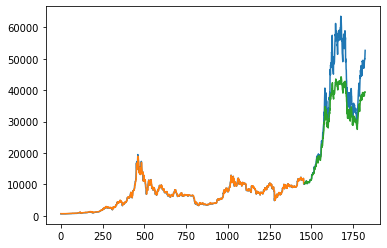

In [25]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# 预测
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# 计算得分
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# 绘图
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
print(testPredictPlot)
plt.show();